<a href="https://colab.research.google.com/github/MochNad/Pembelajaran-Mesin/blob/main/Job_Sheet_7_(Tugas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Pembelajaran Mesin - Job Sheet 7: Clustering**
*   Nama : Moch. Nadi Rafli Maulana
*   NIM : 2141720188
*   No. Absen : 18
*   Kelas : TI-3B
*   Jurusan / Prodi : Teknologi Informasi / D4 - Teknik Informatika

**Download dataset Mall_Customers**

**Tugas**

Buatlah sebuah model K-Means dengan ketentuan,
1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

*Import Library dan Load Data*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


*Menghapus Kolom CostumerID*

In [2]:
df.drop(['CustomerID'], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


*Menampilkan PairPlot*

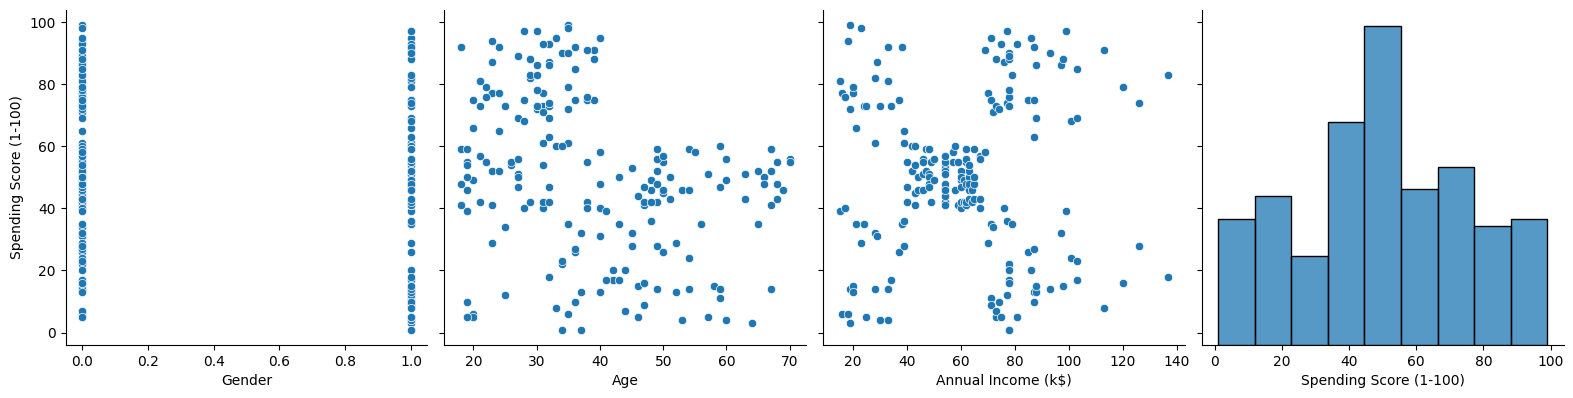

In [3]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

sns.pairplot(df, x_vars=df.columns,
             y_vars=df.columns[-1], height=4, aspect=1, kind='scatter')
plt.show()

*Membuat Model KMenas dengan menggunakan 2 Fitur yaitu Annual Income dan Spending Score*

In [4]:
df_train = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(df_train)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


*Memvisualisasikan Data Fitur*

Text(0, 0.5, 'Spending Score')

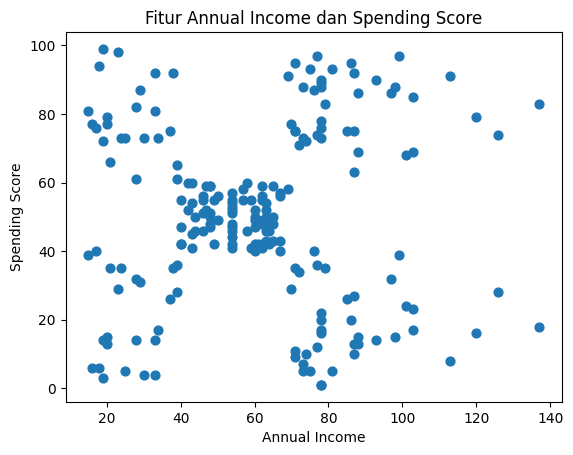

In [5]:
plt.title("Fitur Annual Income dan Spending Score")
plt.scatter(df_train.iloc[:, 0], df_train.iloc[:, 1], s=40)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

*Train KMeans Model*

In [6]:
# Train k-means model
from sklearn.cluster import KMeans

cl_kmeans = KMeans(n_clusters=2, n_init=10)

y_kmeans = cl_kmeans.fit_predict(df_train)
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 182440.3076298702


*Implementasi Metode Elbow*

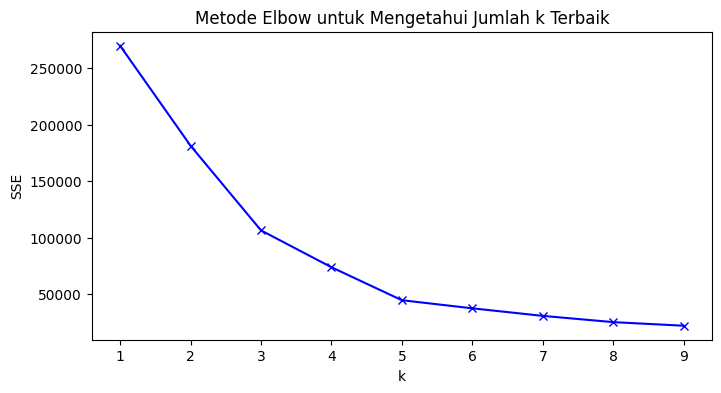

In [7]:
# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1, 10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k, n_init=10)
 kmeanModel.fit(df_train)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8, 4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

*Cek Nilai SSE setiap k*

In [8]:
for idx, sse_val in enumerate(sse, start=1): print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28
k=2; SSE=181363.59595959593
k=3; SSE=106348.37306211122
k=4; SSE=73679.78903948836
k=5; SSE=44448.4554479337
k=6; SSE=37265.86520484346
k=7; SSE=30566.45113025185
k=8; SSE=25028.020475269415
k=9; SSE=21850.165282585636


*Optimalisasi k menggunakan Metode Silhouette*

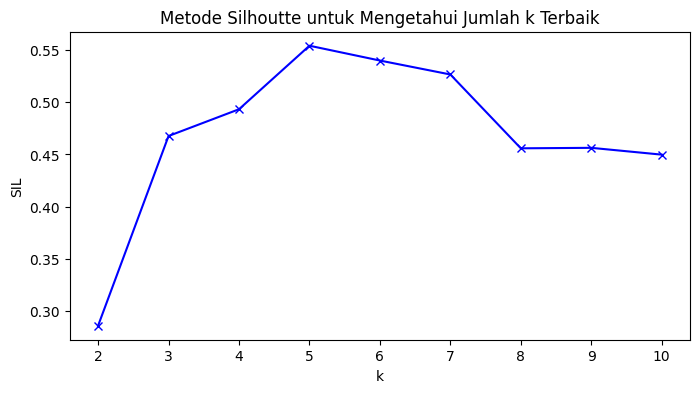

In [9]:
from sklearn.metrics import silhouette_score

# Optimalisasi K dengan silhouette
sil = []
kmax = 10
K = range(2, kmax+1)

for k in K:
  kmeans = KMeans(n_clusters=k, n_init=10).fit(df_train)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_train, labels, metric='euclidean'))

plt.figure(figsize=(8, 4))
plt.plot(K, sil, "bx-")
plt.xlabel("k")
plt.ylabel("SIL")
plt.title("Metode Silhoutte untuk Mengetahui Jumlah k Terbaik")
plt.show()

*Retrain Model menggunkanan k terbaik*

In [10]:
from sklearn.cluster import KMeans

cl_kmeans = KMeans(n_clusters=5, n_init=10)

y_kmeans = cl_kmeans.fit_predict(df_train)

*Visualisasi Kluster*

Text(0, 0.5, 'Spending Score')

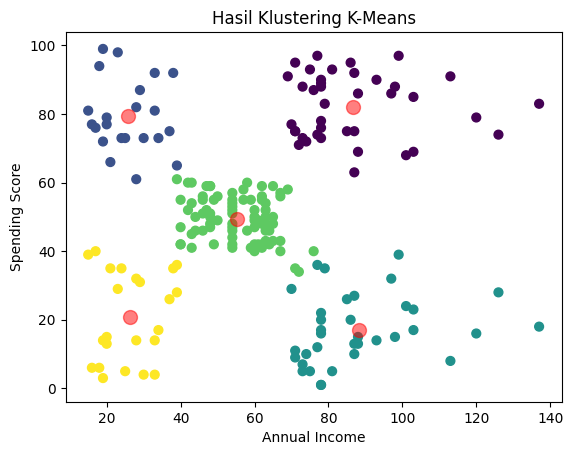

In [11]:
plt.scatter(df_train.iloc[:, 0], df_train.iloc[:, 1], s=40, c=y_kmeans)

centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
plt.title("Hasil Klustering K-Means")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

*Instal Minisom*

In [12]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=2accb6a63826fe3c86ecb57750d9271777e36f1d8804b2f4f0e66ce8aa2bd947
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


*Import Library*

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

*Fungsi untuk Inisialisasi Bobot*

In [14]:
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

*Fungsi untuk Menghitung Jarak antara Vektor Input dan Bobot SOM*

In [15]:
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

*Fungsi untuk menemukan Indeks Unit Pemenang*

In [16]:
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

*Fungsi untuk memperbarui Bobot SOM*

In [17]:
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(
        weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * \
        influence[:, :, np.newaxis] * (input_vector - weights)

*Fungsi untuk melatih SOM*

In [18]:
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    # Ukuran SOM sesuai dengan jumlah saluran warna
    som_shape = (32, 32, input_shape[2])
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * \
            np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner,
                               learning_rate, neighborhood_radius)

    return weights

*Muat Citra Foto*

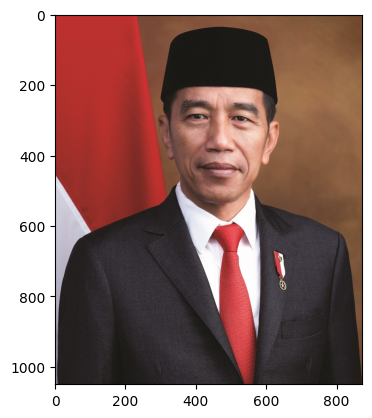

In [19]:
path = "jokowi.jpg"
# Normalisasi intensitas piksel menjadi rentang [0, 1]
img = io.imread(path) / 255.0


plt.imshow(img)

*Latih SOM*

In [20]:
num_epochs = 10
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(img, num_epochs, initial_learning_rate, initial_neighborhood_radius)

*Visualisasi Bobot SOM*

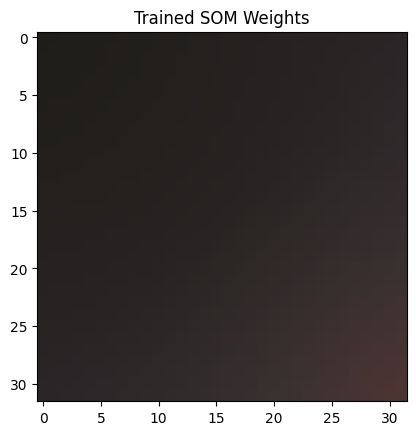

In [21]:
plt.imshow(trained_weights)
plt.title('Trained SOM Weights')
plt.show()